In [264]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [265]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/boxing_matches_balanced.csv')

# data = pd.read_csv("D:/data/new data/Desktop/Data Mining Project/Classification/boxing_matches_balanced.csv")


print(len(df))





106760


In [266]:
# Clean and preprocess the data
print(f"Number of rows before dropping NaN values: {len(df)}")

df = df.fillna(df.mean(numeric_only=True))  # Replace NaN with mean for numeric columns

print(f"Number of rows after replacing NaN with column means: {len(df)}")

# Function to map the result values
def map_result(value):
    if value == 'win_A':
        return 0
    elif value == 'win_B':
        return 1
    elif value == 'Draw':
        return -1
    else:
        return 2

# Apply the function to the result column
df['result'] = df['result'].apply(map_result).astype('int32')  # Ensure the column is integer type


df = df[df['result'] != 2]
df = df[df['result'] != -1]

Number of rows before dropping NaN values: 106760
Number of rows after replacing NaN with column means: 106760


In [267]:
# Feature selection (remove unnecessary columns)
features = df.drop(columns=['stance_A', 'stance_B', 'decision','result'])
target = df['result']

df = df.dropna()

print(f"Number of rows after dropping: {len(df)}")

print(df)

# Step 2: Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Number of rows after dropping: 55881
        age_A      age_B  height_A    height_B     reach_A     reach_B  \
0        31.0  24.000000     180.0  179.000000  175.000000  185.000000   
4        17.0  24.000000     188.0  177.000000  178.180412  177.000000   
6        22.0  20.000000     163.0  175.000000  178.180412  178.408031   
7        18.0  24.000000     188.0  178.000000  178.180412  178.408031   
8        17.0  28.000000     172.0  172.711856  178.000000  178.408031   
...       ...        ...       ...         ...         ...         ...   
106754   21.0  22.000000     178.0  170.000000  184.000000  173.000000   
106755   32.0  23.000000     160.0  172.711856  168.000000  178.408031   
106756   18.0  26.308386     171.0  172.711856  178.000000  178.408031   
106758   26.0  30.000000     178.0  170.000000  183.000000  175.000000   
106759   20.0  31.000000     170.0  165.000000  178.180412  178.408031   

        stance_A  stance_B    weight_A    weight_B  ...  kos_A  kos_B  res

In [268]:
# Step 2: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Step 3: Training the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

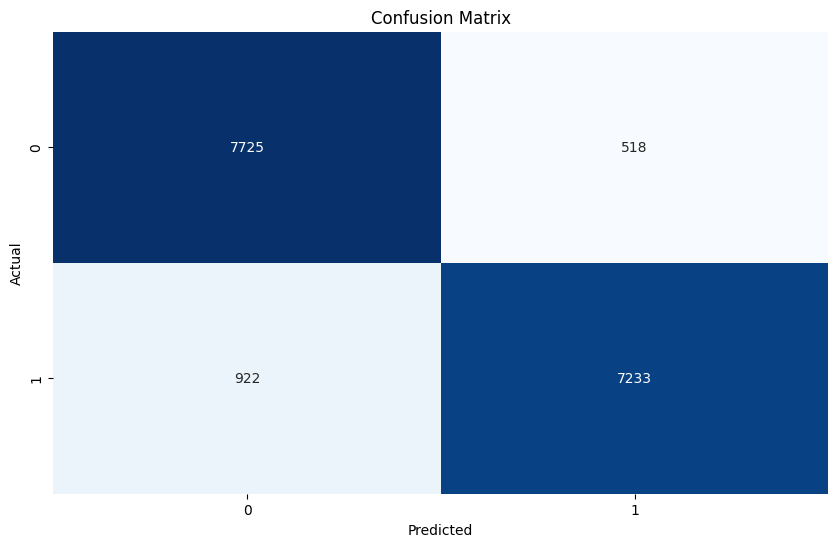

In [269]:
# Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [270]:
# Step 6: Evaluation
actual_vs_predicted = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print("Actual vs Predicted:")
print(actual_vs_predicted.head())

# print("Classification Report:")
# print(classification_report(Y_test, Y_pred))

print("Accuracy:", accuracy_score(Y_test, Y_pred))

Actual vs Predicted:
       Actual  Predicted
41021       0          0
83848       0          0
1608        0          0
65482       1          1
83555       0          0
Accuracy: 0.9121844127332601


In [271]:

unseen_data_dict = pd.DataFrame({
    'age_A': [35],
    'age_B': [28],
    'height_A': [180],
    'height_B': [80],
    'reach_A': [72],
    'reach_B': [70],
    'weight_A': [80],
    'weight_B': [10],
    'won_A':[115],
    'won_B':[100],
    'lost_A':[50],
    'lost_B':[100],
    'drawn_A':[50],
    'drawn_B':[50],
    'kos_A':[20],
    'kos_B':[27],
    'judge1_A':[50],
    # 'judge1_A':[50],
    'judge1_B':[100],
    'judge2_A':[100],
    'judge2_B':[50],
    'judge3_A':[100],
    'judge3_B':[50],

})




#  Convert the dictionary to a DataFrame for processing
unseen_data = pd.DataFrame(unseen_data_dict)

# Ensure the unseen data matches the feature columns of the training data
unseen_data = unseen_data[features.columns]

# Fill missing values (if applicable)
unseen_data = unseen_data.fillna(df.mean(numeric_only=True))

# Normalize the unseen data using the same scaler fitted on training data
unseen_data_scaled = scaler.transform(unseen_data)

# Predict the outcome for the unseen data
unseen_predictions = model.predict(unseen_data_scaled)

# Add predictions as a new column with the target column name ('result')
unseen_data['result'] = unseen_predictions

# Map predictions to readable labels
unseen_data['result_label'] = unseen_data['result'].map({0: 'Player A won', 1: 'Player B won'})

# Output results
print("Unseen Data with Predictions:")
print(unseen_data)

# Display predictions with interpretations
for i, prediction in enumerate(unseen_predictions):
    print(f"Prediction {i + 1}: {unseen_data.loc[i, 'result_label']}")


Unseen Data with Predictions:
   age_A  age_B  height_A  height_B  reach_A  reach_B  weight_A  weight_B  \
0     35     28       180        80       72       70        80        10   

   won_A  won_B  ...  kos_A  kos_B  judge1_A  judge1_B  judge2_A  judge2_B  \
0    115    100  ...     20     27        50       100       100        50   

   judge3_A  judge3_B  result  result_label  
0       100        50       1  Player B won  

[1 rows x 24 columns]
Prediction 1: Player B won
